In [ ]:
#data:
#https://static.quera.org/dl/dk-dataset.zip

In [ ]:
cd drive/

/content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Water Mark/واترمارک.zip' -d '/content/drive/MyDrive/Water Mark/'

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os, os.path

directory =  '/content/drive/MyDrive/Water Mark/dataset/train/'
# images = []
# labels = []
data_len = 8582
images = np.zeros((data_len,224, 224,3), dtype='uint8')
labels = np.zeros((data_len,1), dtype='uint8')
names = {}
count = 0
indx = 0
unique = []

shuffled_indices = random.sample(range(0, 8582), 8582)

lbl = 1
for i in ['positive/','negative/']:
    
    if( i == 'negative/'):
        lbl = 0
    
    folder = directory+str(i)
    for filename in os.listdir(folder):
        print(os.path.join(folder,filename),lbl)
        img = cv2.imread(os.path.join(folder,filename))
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None and count in shuffled_indices:
            img = cv2.resize(img, (224, 224),interpolation = cv2.INTER_NEAREST)
#             data = np.array(img)
#             print(np.shape(data))
#             flattened = data.flatten()
            
            images[indx] = (img/.256)
            labels[indx] = lbl
            names[indx] = (filename)
            indx = indx + 1
        count = count + 1 
        

In [ ]:
import sklearn.datasets

dataset = sklearn.utils.Bunch(name = (names) , data=(images), target=(labels))

In [ ]:
X,y = dataset['data'],dataset['target']


print(X.shape)
print(y.shape)

(8582, 224, 224, 3)
(8582, 1)


In [ ]:
def split_train_valid_test_indices(data_len,test_ratio):
    shuffled_indices = np.random.permutation(data_len)
    test_set_size = int(data_len*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    valid_indices = shuffled_indices[test_set_size:test_set_size*2]
    train_indices = shuffled_indices[test_set_size*2:]
    return list(train_indices), list(valid_indices), list(test_indices)
    

In [ ]:
train_indices , valid_indices , test_indices = split_train_valid_test_indices(X.shape[0],0.2)
train_x = X[train_indices] 
valid_x = X[valid_indices] 
test_x = X[test_indices]
train_y = y[train_indices] 
valid_y = y[valid_indices] 
test_y = y[test_indices]

print(valid_y.shape)
print(valid_y[0])

(1716, 1)
[1]


In [ ]:
# imports for the model
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# imports for the dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Get a pre-built ResNet50 w/o the top layer (classifer) and input shape configured for 128 x 128
base = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling='max')

# Add a new classifier (top) layer for the 10 classes in CIFAR-10
outputs = Dense(1, activation='sigmoid')(base.output)

# Rebuild the model with the new classifier
resnet = Model(base.input, outputs)
# resnet.summary()

# Create the pre-stem as a Sequential model
model = Sequential()

# Add the ResNet50 model as the remaining layers and rebuild
model.add(resnet)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

history=model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=1, 
                    validation_data=(valid_x, valid_y))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
161/161 [==============================] - 63s 355ms/step - loss: 0.9368 - acc: 0.7981 - val_loss: 1.0142 - val_acc: 0.7220
Epoch 2/5
161/161 [==============================] - 56s 346ms/step - loss: 0.2215 - acc: 0.9406 - val_loss: 0.7477 - val_acc: 0.8450
Epoch 3/5
161/161 [==============================] - 56s 347ms/step - loss: 0.0897 - acc: 0.9750 - val_loss: 0.9290 - val_acc: 0.8700
Epoch 4/5
161/161 [==============================] - 56s 346ms/step - loss: 0.0643 - acc: 0.9845 - val_loss: 0.7985 - val_acc: 0.8660
Epoch 5/5
161/161 [==============================] - 56s 347ms/step - loss: 0.0498 - acc: 0.9905 - val_loss: 0.8650 - val_acc: 0.8759


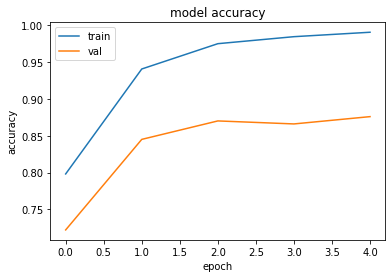

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(test_x, test_y, verbose=1)

54/54 [==============================] - 5s 94ms/step - loss: 0.6745 - acc: 0.8846
